In [1]:
import numpy as np
import pandas as pd

In [2]:
stock_path = "/home/lab/Downloads/3450.csv"
index_path = "/home/lab/Downloads/TW.csv"

In [3]:
stock_df = pd.read_csv(stock_path)
stock_df

,Date,Open,High,Low,Close
0,2010-01-04,24.568600,25.515600,23.937300,25.515600
1,2010-01-05,25.936399,25.962700,23.753201,23.937300
2,2010-01-06,23.989901,24.989500,23.937300,24.253000
3,2010-01-07,24.936899,24.989500,23.779499,23.858400
4,2010-01-08,24.568600,25.515600,24.463400,25.515600
...,...,...,...,...,...
2446,2019-12-25,56.599998,57.400002,56.299999,57.000000
2447,2019-12-26,58.000000,59.200001,57.599998,58.299999
2448,2019-12-27,58.599998,59.599998,58.400002,59.400002
2449,2019-12-30,61.799999,65.300003,61.799999,65.300003


In [4]:
index_df = pd.read_csv(index_path)
index_df

,Date,Open,High,Low,Close
0,2010-01-04,8222.419922,8240.450195,8143.450195,8207.849609
1,2010-01-05,8277.709961,8283.639648,8162.540039,8211.400391
2,2010-01-06,8237.099609,8327.870117,8216.919922,8327.620117
3,2010-01-07,8344.559570,8369.549805,8233.589844,8237.419922
4,2010-01-08,8266.870117,8290.660156,8178.930176,8280.900391
...,...,...,...,...,...
2446,2019-12-25,11978.940430,12032.370117,11973.950195,12008.129883
2447,2019-12-26,12018.379883,12030.660156,11982.639648,12001.009766
2448,2019-12-27,12032.719727,12093.019531,12032.719727,12091.589844
2449,2019-12-30,12094.809570,12114.889648,12046.219727,12053.370117


In [5]:
stock_df[1:2]["Close"].values

array([23.9373])

In [6]:
rate = [0]

for i in range(1,2451,1):
    diff = (stock_df[i:i+1]["Close"].values - stock_df[i-1:i]["Close"].values)/stock_df[i-1:i]["Close"].values
    rate.extend(diff)

In [7]:
rate = np.array(rate)*100
rate = rate.tolist()

In [8]:
stock_df["Change(%)"] = rate
stock_df

,Date,Open,High,Low,Close,Change(%)
0,2010-01-04,24.568600,25.515600,23.937300,25.515600,0.000000
1,2010-01-05,25.936399,25.962700,23.753201,23.937300,-6.185628
2,2010-01-06,23.989901,24.989500,23.937300,24.253000,1.318862
3,2010-01-07,24.936899,24.989500,23.779499,23.858400,-1.627015
4,2010-01-08,24.568600,25.515600,24.463400,25.515600,6.945981
...,...,...,...,...,...,...
2446,2019-12-25,56.599998,57.400002,56.299999,57.000000,0.706717
2447,2019-12-26,58.000000,59.200001,57.599998,58.299999,2.280700
2448,2019-12-27,58.599998,59.599998,58.400002,59.400002,1.886798
2449,2019-12-30,61.799999,65.300003,61.799999,65.300003,9.932661


In [9]:
rate = [0]

for i in range(1,2451,1):
    diff = (index_df[i:i+1]["Close"].values - index_df[i-1:i]["Close"].values)/index_df[i-1:i]["Close"].values
    rate.extend(diff)

In [10]:
rate = np.array(rate)*100
rate = rate.tolist()

In [11]:
index_df["Change(%)"] = rate
index_df

,Date,Open,High,Low,Close,Change(%)
0,2010-01-04,8222.419922,8240.450195,8143.450195,8207.849609,0.000000
1,2010-01-05,8277.709961,8283.639648,8162.540039,8211.400391,0.043261
2,2010-01-06,8237.099609,8327.870117,8216.919922,8327.620117,1.415346
3,2010-01-07,8344.559570,8369.549805,8233.589844,8237.419922,-1.083145
4,2010-01-08,8266.870117,8290.660156,8178.930176,8280.900391,0.527841
...,...,...,...,...,...,...
2446,2019-12-25,11978.940430,12032.370117,11973.950195,12008.129883,0.265105
2447,2019-12-26,12018.379883,12030.660156,11982.639648,12001.009766,-0.059294
2448,2019-12-27,12032.719727,12093.019531,12032.719727,12091.589844,0.754770
2449,2019-12-30,12094.809570,12114.889648,12046.219727,12053.370117,-0.316085


In [12]:
beta_7D = [0,0,0,0,0,0,0]
for i in range(8,2452):
    cov = stock_df[i-7:i]["Change(%)"].cov(index_df[i-7:i]["Change(%)"])
    var = index_df[i-7:i]["Change(%)"].var()
    beta = cov/var
    beta_7D.append(beta)

In [13]:
len(beta_7D)

2451

In [14]:
stock_df["market_Change(%)"] = index_df[:]["Change(%)"]
stock_df["Beta_7D"] = beta_7D

In [15]:
stock_df

,Date,Open,High,Low,Close,Change(%),market_Change(%),Beta_7D
0,2010-01-04,24.568600,25.515600,23.937300,25.515600,0.000000,0.000000,0.000000
1,2010-01-05,25.936399,25.962700,23.753201,23.937300,-6.185628,0.043261,0.000000
2,2010-01-06,23.989901,24.989500,23.937300,24.253000,1.318862,1.415346,0.000000
3,2010-01-07,24.936899,24.989500,23.779499,23.858400,-1.627015,-1.083145,0.000000
4,2010-01-08,24.568600,25.515600,24.463400,25.515600,6.945981,0.527841,0.000000
...,...,...,...,...,...,...,...,...
2446,2019-12-25,56.599998,57.400002,56.299999,57.000000,0.706717,0.265105,-0.680702
2447,2019-12-26,58.000000,59.200001,57.599998,58.299999,2.280700,-0.059294,-0.530902
2448,2019-12-27,58.599998,59.599998,58.400002,59.400002,1.886798,0.754770,-0.093267
2449,2019-12-30,61.799999,65.300003,61.799999,65.300003,9.932661,-0.316085,-2.971407


In [16]:
beta_30D = []
for i in range(0,30):
    beta_30D.append(0)
for i in range(31,2452):
    cov = stock_df[i-30:i]["Change(%)"].cov(index_df[i-30:i]["Change(%)"])
    var = index_df[i-30:i]["Change(%)"].var()
    beta = cov/var
    beta_30D.append(beta)

In [17]:
stock_df["Beta_30D"] = beta_30D

In [18]:
stock_df

,Date,Open,High,Low,Close,Change(%),market_Change(%),Beta_7D,Beta_30D
0,2010-01-04,24.568600,25.515600,23.937300,25.515600,0.000000,0.000000,0.000000,0.000000
1,2010-01-05,25.936399,25.962700,23.753201,23.937300,-6.185628,0.043261,0.000000,0.000000
2,2010-01-06,23.989901,24.989500,23.937300,24.253000,1.318862,1.415346,0.000000,0.000000
3,2010-01-07,24.936899,24.989500,23.779499,23.858400,-1.627015,-1.083145,0.000000,0.000000
4,2010-01-08,24.568600,25.515600,24.463400,25.515600,6.945981,0.527841,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2446,2019-12-25,56.599998,57.400002,56.299999,57.000000,0.706717,0.265105,-0.680702,0.016331
2447,2019-12-26,58.000000,59.200001,57.599998,58.299999,2.280700,-0.059294,-0.530902,-0.133854
2448,2019-12-27,58.599998,59.599998,58.400002,59.400002,1.886798,0.754770,-0.093267,-0.056504
2449,2019-12-30,61.799999,65.300003,61.799999,65.300003,9.932661,-0.316085,-2.971407,-0.560891


In [19]:
K_value = [0,0,0,0,0,0,0,50.0]
D_value = [0,0,0,0,0,0,0,50.0]
for i in range(9,2452):
    rsv = (stock_df[i-1:i]["Close"].values - stock_df[i-9:i]["Low"].min())*100/(stock_df[i-9:i]["High"].max()-stock_df[i-9:i]["Low"].min())
    k = (np.array(K_value[i-2:i-1])*(2.0/3.0)) + float(rsv)/3.0
    K_value.extend(k.tolist())
    d = (np.array(D_value[i-2:i-1])*(2.0/3.0)) + np.array(K_value[i-1:i])/3.0
    D_value.extend(d.tolist())
    print("Day",i," : K = ",k," D = ",d," RSV = ",rsv)

Day 9  : K =  [66.66666667]  D =  [55.55555556]  RSV =  [100.]
Day 10  : K =  [77.77777778]  D =  [62.96296296]  RSV =  [100.]
Day 11  : K =  [85.18518519]  D =  [70.37037037]  RSV =  [100.]
Day 12  : K =  [83.37043055]  D =  [74.70372376]  RSV =  [79.74092127]
Day 13  : K =  [77.80251311]  D =  [75.73665355]  RSV =  [66.66667824]
Day 14  : K =  [65.0929311]  D =  [72.18874606]  RSV =  [39.67376707]
Day 15  : K =  [58.05390478]  D =  [67.4771323]  RSV =  [43.97585216]
Day 16  : K =  [45.12827616]  D =  [60.02751359]  RSV =  [19.2770189]
Day 17  : K =  [30.08551744]  D =  [50.0468482]  RSV =  [0.]
Day 18  : K =  [23.52924072]  D =  [41.20764571]  RSV =  [10.41668729]
Day 19  : K =  [25.2349489]  D =  [35.88341344]  RSV =  [28.64636525]
Day 20  : K =  [28.69085695]  D =  [33.48589461]  RSV =  [35.60267306]
Day 21  : K =  [35.53328579]  D =  [34.16835834]  RSV =  [49.21814348]
Day 22  : K =  [32.96418598]  D =  [33.76696755]  RSV =  [27.82598635]
Day 23  : K =  [42.39669482]  D =  [36.643

Day 164  : K =  [26.24500958]  D =  [37.83645687]  RSV =  [22.57990689]
Day 165  : K =  [26.09889711]  D =  [33.92393695]  RSV =  [25.80667216]
Day 166  : K =  [30.83991471]  D =  [32.89592954]  RSV =  [40.32194992]
Day 167  : K =  [52.8618642]  D =  [39.55124109]  RSV =  [96.90576316]
Day 168  : K =  [57.35665916]  D =  [45.48638045]  RSV =  [66.3462491]
Day 169  : K =  [62.27656576]  D =  [51.08310889]  RSV =  [72.11637897]
Day 170  : K =  [65.786574]  D =  [55.98426392]  RSV =  [72.80659046]
Day 171  : K =  [74.26700349]  D =  [62.07851045]  RSV =  [91.22786248]
Day 172  : K =  [76.66199094]  D =  [66.93967061]  RSV =  [81.45196584]
Day 173  : K =  [84.44132729]  D =  [72.77355617]  RSV =  [100.]
Day 174  : K =  [89.62755153]  D =  [78.39155462]  RSV =  [100.]
Day 175  : K =  [88.13448247]  D =  [81.63919724]  RSV =  [85.14834436]
Day 176  : K =  [85.91659136]  D =  [83.06499528]  RSV =  [81.48080914]
Day 177  : K =  [84.40516719]  D =  [83.51171925]  RSV =  [81.38231884]
Day 178  :

Day 288  : K =  [78.92483389]  D =  [79.22792914]  RSV =  [69.18593202]
Day 289  : K =  [85.94988926]  D =  [81.46858252]  RSV =  [100.]
Day 290  : K =  [85.24114053]  D =  [82.72610185]  RSV =  [83.82364307]
Day 291  : K =  [79.49401583]  D =  [81.64873985]  RSV =  [67.99976643]
Day 292  : K =  [69.03386251]  D =  [77.44378073]  RSV =  [48.11355587]
Day 293  : K =  [56.60464434]  D =  [70.49740194]  RSV =  [31.74620799]
Day 294  : K =  [41.13777757]  D =  [60.71086048]  RSV =  [10.20404403]
Day 295  : K =  [27.42518504]  D =  [49.61563533]  RSV =  [0.]
Day 296  : K =  [25.76193265]  D =  [41.66440111]  RSV =  [22.43542786]
Day 297  : K =  [20.40711994]  D =  [34.57864072]  RSV =  [9.69749452]
Day 298  : K =  [21.88758904]  D =  [30.34829016]  RSV =  [24.84852723]
Day 299  : K =  [26.10706661]  D =  [28.93454897]  RSV =  [34.54602175]
Day 300  : K =  [34.45275523]  D =  [30.77395106]  RSV =  [51.14413247]
Day 301  : K =  [40.2810653]  D =  [33.94298914]  RSV =  [51.93768546]
Day 302  :

Day 427  : K =  [49.34737692]  D =  [45.4557676]  RSV =  [51.42967078]
Day 428  : K =  [34.77583363]  D =  [41.89578961]  RSV =  [5.63274704]
Day 429  : K =  [23.18388908]  D =  [35.65848943]  RSV =  [0.]
Day 430  : K =  [26.02492003]  D =  [32.44729963]  RSV =  [31.70698192]
Day 431  : K =  [29.87042266]  D =  [31.58834064]  RSV =  [37.56142791]
Day 432  : K =  [30.8077582]  D =  [31.32814649]  RSV =  [32.6824293]
Day 433  : K =  [37.93674376]  D =  [33.53101225]  RSV =  [52.19471488]
Day 434  : K =  [35.20987059]  D =  [34.0906317]  RSV =  [29.75612425]
Day 435  : K =  [36.2936947]  D =  [34.82498603]  RSV =  [38.46134293]
Day 436  : K =  [43.0365568]  D =  [37.56217629]  RSV =  [56.52228099]
Day 437  : K =  [56.80784227]  D =  [43.97739828]  RSV =  [84.35041322]
Day 438  : K =  [56.39151631]  D =  [48.11543763]  RSV =  [55.55886439]
Day 439  : K =  [67.45482146]  D =  [54.5618989]  RSV =  [89.58143174]
Day 440  : K =  [71.11375416]  D =  [60.07918399]  RSV =  [78.43161956]
Day 441  

Day 574  : K =  [32.04084052]  D =  [20.91877665]  RSV =  [64.3396004]
Day 575  : K =  [40.82773576]  D =  [27.55509636]  RSV =  [58.40152623]
Day 576  : K =  [54.70975089]  D =  [36.60664787]  RSV =  [82.47378116]
Day 577  : K =  [57.61988625]  D =  [43.61106066]  RSV =  [63.44015697]
Day 578  : K =  [62.42677396]  D =  [49.88296509]  RSV =  [72.04054938]
Day 579  : K =  [55.95456175]  D =  [51.90683065]  RSV =  [43.01013734]
Day 580  : K =  [52.71480267]  D =  [52.17615465]  RSV =  [46.2352845]
Day 581  : K =  [46.25476707]  D =  [50.20235879]  RSV =  [33.33469588]
Day 582  : K =  [30.83651138]  D =  [43.74707632]  RSV =  [0.]
Day 583  : K =  [29.87749113]  D =  [39.12388126]  RSV =  [27.95945062]
Day 584  : K =  [21.7508245]  D =  [33.33286234]  RSV =  [5.49749123]
Day 585  : K =  [18.76480758]  D =  [28.47684409]  RSV =  [12.79277376]
Day 586  : K =  [13.02259266]  D =  [23.32542694]  RSV =  [1.53816281]
Day 587  : K =  [9.219274]  D =  [18.62337596]  RSV =  [1.6126367]
Day 588  : 

Day 724  : K =  [79.318041]  D =  [74.97558659]  RSV =  [77.14173762]
Day 725  : K =  [83.91272473]  D =  [77.95463264]  RSV =  [93.10209218]
Day 726  : K =  [86.91063108]  D =  [80.93996545]  RSV =  [92.90644379]
Day 727  : K =  [85.97067204]  D =  [82.61686765]  RSV =  [84.09075396]
Day 728  : K =  [75.61417893]  D =  [80.28263807]  RSV =  [54.90119269]
Day 729  : K =  [61.65440899]  D =  [74.07322838]  RSV =  [33.73486912]
Day 730  : K =  [43.91381199]  D =  [64.02008958]  RSV =  [8.43261798]
Day 731  : K =  [47.94223719]  D =  [58.66080545]  RSV =  [55.99908759]
Day 732  : K =  [47.96159284]  D =  [55.09440125]  RSV =  [48.00030414]
Day 733  : K =  [49.6409225]  D =  [53.276575]  RSV =  [52.99958181]
Day 734  : K =  [48.76076707]  D =  [51.77130569]  RSV =  [47.0004562]
Day 735  : K =  [50.50696261]  D =  [51.349858]  RSV =  [53.99935371]
Day 736  : K =  [55.3384693]  D =  [52.6793951]  RSV =  [65.00148266]
Day 737  : K =  [70.2256462]  D =  [58.52814546]  RSV =  [100.]
Day 738  : 

Day 872  : K =  [21.02692264]  D =  [18.29516016]  RSV =  [36.36300408]
Day 873  : K =  [31.22213544]  D =  [22.60415192]  RSV =  [51.61256104]
Day 874  : K =  [38.81515562]  D =  [28.00781982]  RSV =  [54.00119597]
Day 875  : K =  [39.21009868]  D =  [31.74191277]  RSV =  [39.99998479]
Day 876  : K =  [32.14017755]  D =  [31.8746677]  RSV =  [18.0003353]
Day 877  : K =  [31.42741483]  D =  [31.72558341]  RSV =  [30.00188937]
Day 878  : K =  [26.95172165]  D =  [30.13429615]  RSV =  [18.0003353]
Day 879  : K =  [24.09035604]  D =  [28.11964945]  RSV =  [18.36762481]
Day 880  : K =  [20.60486324]  D =  [25.61472071]  RSV =  [13.63387766]
Day 881  : K =  [18.28120138]  D =  [23.17021427]  RSV =  [13.63387766]
Day 882  : K =  [42.8545494]  D =  [29.73165931]  RSV =  [92.00124544]
Day 883  : K =  [57.57395273]  D =  [39.01242379]  RSV =  [87.01275939]
Day 884  : K =  [66.65271329]  D =  [48.22585362]  RSV =  [84.8102344]
Day 885  : K =  [70.3173414]  D =  [55.58968288]  RSV =  [77.64659763

Day 1011  : K =  [30.30515855]  D =  [28.16616135]  RSV =  [40.32133801]
Day 1012  : K =  [42.78405584]  D =  [33.03879285]  RSV =  [67.74185043]
Day 1013  : K =  [48.52269007]  D =  [38.20009192]  RSV =  [59.99995853]
Day 1014  : K =  [47.6814074]  D =  [41.36053041]  RSV =  [45.99884205]
Day 1015  : K =  [41.78698021]  D =  [41.50268035]  RSV =  [29.99812583]
Day 1016  : K =  [37.85736208]  D =  [40.28757426]  RSV =  [29.99812583]
Day 1017  : K =  [35.23761667]  D =  [38.60425506]  RSV =  [29.99812583]
Day 1018  : K =  [44.15830188]  D =  [40.455604]  RSV =  [61.99967231]
Day 1019  : K =  [57.8701229]  D =  [46.26044363]  RSV =  [85.29376494]
Day 1020  : K =  [64.77082062]  D =  [52.4305693]  RSV =  [78.57221606]
Day 1021  : K =  [72.51375572]  D =  [59.12496477]  RSV =  [87.99962592]
Day 1022  : K =  [81.67583715]  D =  [66.64192223]  RSV =  [100.]
Day 1023  : K =  [84.78746941]  D =  [72.69043796]  RSV =  [91.01073394]
Day 1024  : K =  [87.68444421]  D =  [77.68844004]  RSV =  [93.

Day 1132  : K =  [45.39812167]  D =  [42.67727528]  RSV =  [51.35166042]
Day 1133  : K =  [40.06908214]  D =  [41.80787756]  RSV =  [29.41100307]
Day 1134  : K =  [35.90787797]  D =  [39.84121103]  RSV =  [27.58546962]
Day 1135  : K =  [38.04112711]  D =  [39.24118306]  RSV =  [42.30762539]
Day 1136  : K =  [47.15572386]  D =  [41.87936332]  RSV =  [65.38491738]
Day 1137  : K =  [46.8220057]  D =  [43.52691078]  RSV =  [46.15456936]
Day 1138  : K =  [60.70202972]  D =  [49.25195043]  RSV =  [88.46207777]
Day 1139  : K =  [58.98645177]  D =  [52.49678421]  RSV =  [55.55529586]
Day 1140  : K =  [56.60839034]  D =  [53.86731958]  RSV =  [51.85226747]
Day 1141  : K =  [48.84989407]  D =  [52.19484441]  RSV =  [33.33290155]
Day 1142  : K =  [44.91237536]  D =  [49.76735473]  RSV =  [37.03733793]
Day 1143  : K =  [29.94158357]  D =  [43.15876434]  RSV =  [0.]
Day 1144  : K =  [25.29443082]  D =  [37.2039865]  RSV =  [16.0001253]
Day 1145  : K =  [23.52967275]  D =  [32.64588192]  RSV =  [20.

Day 1248  : K =  [22.10219465]  D =  [21.4687983]  RSV =  [38.46057344]
Day 1249  : K =  [35.94669981]  D =  [26.29476547]  RSV =  [63.63571013]
Day 1250  : K =  [45.17636992]  D =  [32.58863362]  RSV =  [63.63571013]
Day 1251  : K =  [48.2997364]  D =  [37.82566788]  RSV =  [54.54646936]
Day 1252  : K =  [50.38198072]  D =  [42.01110549]  RSV =  [54.54646936]
Day 1253  : K =  [48.73916403]  D =  [44.25379167]  RSV =  [45.45353064]
Day 1254  : K =  [44.61421749]  D =  [44.37393361]  RSV =  [36.36432443]
Day 1255  : K =  [44.89398854]  D =  [44.54728525]  RSV =  [45.45353064]
Day 1256  : K =  [39.0197876]  D =  [42.70478604]  RSV =  [27.27138571]
Day 1257  : K =  [29.34716246]  D =  [38.25224484]  RSV =  [10.00191219]
Day 1258  : K =  [26.97229189]  D =  [34.49226053]  RSV =  [22.22255076]
Day 1259  : K =  [49.09302371]  D =  [39.35918159]  RSV =  [93.33448733]
Day 1260  : K =  [61.61750434]  D =  [46.7786225]  RSV =  [86.6664656]
Day 1261  : K =  [63.30082597]  D =  [52.28602366]  RSV 

Day 1367  : K =  [44.41097511]  D =  [53.82516455]  RSV =  [33.33315861]
Day 1368  : K =  [32.6376566]  D =  [46.7626619]  RSV =  [9.09101958]
Day 1369  : K =  [26.00087821]  D =  [39.84206733]  RSV =  [12.72732143]
Day 1370  : K =  [17.3339188]  D =  [32.33935116]  RSV =  [0.]
Day 1371  : K =  [16.43389583]  D =  [27.03753272]  RSV =  [14.63384989]
Day 1372  : K =  [22.39756423]  D =  [25.49087655]  RSV =  [34.32490101]
Day 1373  : K =  [27.72792008]  D =  [26.23655773]  RSV =  [38.3886318]
Day 1374  : K =  [30.90761003]  D =  [27.79357516]  RSV =  [37.26698993]
Day 1375  : K =  [26.76945189]  D =  [27.45220074]  RSV =  [18.49313561]
Day 1376  : K =  [24.51286338]  D =  [26.47242162]  RSV =  [19.99968637]
Day 1377  : K =  [33.84202786]  D =  [28.92895703]  RSV =  [52.5003568]
Day 1378  : K =  [32.56118453]  D =  [30.13969953]  RSV =  [29.99949787]
Day 1379  : K =  [36.70748777]  D =  [32.32896228]  RSV =  [45.00009425]
Day 1380  : K =  [40.21256825]  D =  [34.95683093]  RSV =  [47.222

Day 1500  : K =  [82.57218512]  D =  [71.07060766]  RSV =  [91.66686687]
Day 1501  : K =  [81.31075433]  D =  [74.48398988]  RSV =  [78.78789275]
Day 1502  : K =  [78.44966652]  D =  [75.8058821]  RSV =  [72.72749091]
Day 1503  : K =  [73.8052927]  D =  [75.13901896]  RSV =  [64.51654506]
Day 1504  : K =  [78.72741075]  D =  [76.33514956]  RSV =  [88.57164684]
Day 1505  : K =  [82.48519183]  D =  [78.38516365]  RSV =  [90.00075398]
Day 1506  : K =  [77.90677578]  D =  [78.22570103]  RSV =  [68.74994369]
Day 1507  : K =  [76.93774905]  D =  [77.7963837]  RSV =  [74.99969558]
Day 1508  : K =  [71.80455542]  D =  [75.79910761]  RSV =  [61.53816817]
Day 1509  : K =  [78.82213494]  D =  [76.80678339]  RSV =  [92.85729398]
Day 1510  : K =  [79.01870478]  D =  [77.54409052]  RSV =  [79.41184445]
Day 1511  : K =  [73.26726101]  D =  [76.11848068]  RSV =  [61.76437346]
Day 1512  : K =  [66.79351519]  D =  [73.01015885]  RSV =  [53.84602356]
Day 1513  : K =  [65.58165019]  D =  [70.5339893]  RSV

Day 1632  : K =  [13.99564949]  D =  [23.33373395]  RSV =  [4.99854677]
Day 1633  : K =  [17.1735334]  D =  [21.28033377]  RSV =  [23.52930123]
Day 1634  : K =  [15.15244947]  D =  [19.23770567]  RSV =  [11.11028161]
Day 1635  : K =  [10.10163298]  D =  [16.19234811]  RSV =  [0.]
Day 1636  : K =  [8.8176797]  D =  [13.7341253]  RSV =  [6.24977314]
Day 1637  : K =  [7.32775727]  D =  [11.59866929]  RSV =  [4.34791242]
Day 1638  : K =  [6.11977201]  D =  [9.7723702]  RSV =  [3.70380148]
Day 1639  : K =  [18.18250571]  D =  [12.5757487]  RSV =  [42.3079731]
Day 1640  : K =  [23.66012459]  D =  [16.27054066]  RSV =  [34.61536236]
Day 1641  : K =  [24.74769401]  D =  [19.09625845]  RSV =  [26.92283284]
Day 1642  : K =  [21.6268123]  D =  [19.9397764]  RSV =  [15.38504887]
Day 1643  : K =  [24.56275732]  D =  [21.48077004]  RSV =  [30.43464736]
Day 1644  : K =  [33.76670197]  D =  [25.57608068]  RSV =  [52.17459126]
Day 1645  : K =  [42.11908253]  D =  [31.09041463]  RSV =  [58.82384365]
Day

Day 1763  : K =  [41.45131301]  D =  [53.88291055]  RSV =  [14.81372293]
Day 1764  : K =  [33.80414627]  D =  [47.18998912]  RSV =  [18.5098128]
Day 1765  : K =  [41.05244857]  D =  [45.14414227]  RSV =  [55.54905316]
Day 1766  : K =  [43.41731128]  D =  [44.56853194]  RSV =  [48.14703671]
Day 1767  : K =  [46.27861221]  D =  [45.1385587]  RSV =  [52.00121407]
Day 1768  : K =  [58.38913776]  D =  [49.55541838]  RSV =  [82.61018885]
Day 1769  : K =  [63.56259504]  D =  [54.22447727]  RSV =  [73.90950962]
Day 1770  : K =  [64.11137077]  D =  [57.52010844]  RSV =  [65.20892222]
Day 1771  : K =  [58.68061754]  D =  [57.9069448]  RSV =  [47.81911107]
Day 1772  : K =  [54.27120763]  D =  [56.69503241]  RSV =  [45.45238781]
Day 1773  : K =  [44.02241634]  D =  [52.47082705]  RSV =  [23.52483376]
Day 1774  : K =  [29.34827756]  D =  [44.76331056]  RSV =  [0.]
Day 1775  : K =  [28.54104979]  D =  [39.3558903]  RSV =  [26.92659427]
Day 1776  : K =  [25.43748327]  D =  [34.71642129]  RSV =  [19.2

Day 1910  : K =  [66.79790487]  D =  [71.50087046]  RSV =  [50.00476439]
Day 1911  : K =  [56.43609086]  D =  [66.47927726]  RSV =  [35.71246285]
Day 1912  : K =  [43.68404058]  D =  [58.88086503]  RSV =  [18.17994]
Day 1913  : K =  [37.45523565]  D =  [51.73898857]  RSV =  [24.99762581]
Day 1914  : K =  [33.30269904]  D =  [45.59355873]  RSV =  [24.99762581]
Day 1915  : K =  [48.86759775]  D =  [46.68490507]  RSV =  [79.99739517]
Day 1916  : K =  [57.91243819]  D =  [50.42741611]  RSV =  [76.00211907]
Day 1917  : K =  [69.27520109]  D =  [56.7100111]  RSV =  [92.00072689]
Day 1918  : K =  [72.11000172]  D =  [61.84334131]  RSV =  [77.779603]
Day 1919  : K =  [78.1822755]  D =  [67.28965271]  RSV =  [90.32682304]
Day 1920  : K =  [70.40215762]  D =  [68.32715434]  RSV =  [54.84192186]
Day 1921  : K =  [74.89331592]  D =  [70.51587487]  RSV =  [83.87563252]
Day 1922  : K =  [77.31159877]  D =  [72.78111617]  RSV =  [82.14816447]
Day 1923  : K =  [75.78329918]  D =  [73.78184384]  RSV = 

Day 2053  : K =  [55.79502243]  D =  [51.87787234]  RSV =  [45.45394]
Day 2054  : K =  [61.39741961]  D =  [55.05105476]  RSV =  [72.60221397]
Day 2055  : K =  [65.93150078]  D =  [58.6778701]  RSV =  [74.99966312]
Day 2056  : K =  [66.87109276]  D =  [61.40894432]  RSV =  [68.75027672]
Day 2057  : K =  [69.58061622]  D =  [64.13283495]  RSV =  [74.99966312]
Day 2058  : K =  [73.05392894]  D =  [67.10653295]  RSV =  [80.0005544]
Day 2059  : K =  [73.14700214]  D =  [69.12002268]  RSV =  [73.33314853]
Day 2060  : K =  [70.33323338]  D =  [69.52442625]  RSV =  [64.70569585]
Day 2061  : K =  [66.49680926]  D =  [68.51522058]  RSV =  [58.82396104]
Day 2062  : K =  [66.55360114]  D =  [67.86134744]  RSV =  [66.66718489]
Day 2063  : K =  [66.59160199]  D =  [67.43809896]  RSV =  [66.66760371]
Day 2064  : K =  [68.20282071]  D =  [67.69300621]  RSV =  [71.42525815]
Day 2065  : K =  [66.89583755]  D =  [67.42728332]  RSV =  [64.28187124]
Day 2066  : K =  [74.7561348]  D =  [69.87023381]  RSV =

Day 2170  : K =  [53.7358515]  D =  [40.23764298]  RSV =  [78.52350525]
Day 2171  : K =  [63.80444445]  D =  [48.09324347]  RSV =  [83.94163035]
Day 2172  : K =  [67.11050785]  D =  [54.4323316]  RSV =  [73.72263466]
Day 2173  : K =  [76.12718958]  D =  [61.66395093]  RSV =  [94.16055304]
Day 2174  : K =  [77.69211181]  D =  [67.00667122]  RSV =  [80.82195628]
Day 2175  : K =  [84.61523865]  D =  [72.8761937]  RSV =  [98.46149231]
Day 2176  : K =  [78.83440758]  D =  [74.86226499]  RSV =  [67.27274545]
Day 2177  : K =  [78.79740798]  D =  [76.17397932]  RSV =  [78.72340878]
Day 2178  : K =  [65.03160532]  D =  [72.45985466]  RSV =  [37.5]
Day 2179  : K =  [47.37739849]  D =  [64.09903593]  RSV =  [12.06898484]
Day 2180  : K =  [43.07918718]  D =  [57.09241968]  RSV =  [34.48276457]
Day 2181  : K =  [62.05279146]  D =  [58.74587694]  RSV =  [100.]
Day 2182  : K =  [70.49133115]  D =  [62.66102834]  RSV =  [87.36841053]
Day 2183  : K =  [78.92403831]  D =  [68.08203166]  RSV =  [95.78945

Day 2290  : K =  [5.76682224]  D =  [10.12803637]  RSV =  [2.22223333]
Day 2291  : K =  [11.16163313]  D =  [10.47256863]  RSV =  [21.95125491]
Day 2292  : K =  [9.69334192]  D =  [10.21282639]  RSV =  [6.7567595]
Day 2293  : K =  [12.42714373]  D =  [10.95093217]  RSV =  [17.89474737]
Day 2294  : K =  [10.74090635]  D =  [10.88092356]  RSV =  [7.36843158]
Day 2295  : K =  [7.16060423]  D =  [9.64081712]  RSV =  [0.]
Day 2296  : K =  [5.09119012]  D =  [8.12427479]  RSV =  [0.9523619]
Day 2297  : K =  [4.00575049]  D =  [6.75143336]  RSV =  [1.83487122]
Day 2298  : K =  [10.14177138]  D =  [7.88154603]  RSV =  [22.41381317]
Day 2299  : K =  [9.6347434]  D =  [8.46594515]  RSV =  [8.62068743]
Day 2300  : K =  [8.36491879]  D =  [8.4322697]  RSV =  [5.82526958]
Day 2301  : K =  [8.35439361]  D =  [8.406311]  RSV =  [8.33334325]
Day 2302  : K =  [6.67334792]  D =  [7.82865664]  RSV =  [3.31125652]
Day 2303  : K =  [12.21833988]  D =  [9.29188439]  RSV =  [23.30832382]
Day 2304  : K =  [21

Day 2445  : K =  [84.34996262]  D =  [76.17521651]  RSV =  [93.61704391]
Day 2446  : K =  [82.22198887]  D =  [78.1908073]  RSV =  [77.96604137]
Day 2447  : K =  [83.06323724]  D =  [79.81495061]  RSV =  [84.74573398]
Day 2448  : K =  [84.2312036]  D =  [81.28703494]  RSV =  [86.56713633]
Day 2449  : K =  [88.4924635]  D =  [83.68884446]  RSV =  [97.01498329]
Day 2450  : K =  [92.328309]  D =  [86.56866597]  RSV =  [100.]
Day 2451  : K =  [94.88553933]  D =  [89.34095709]  RSV =  [100.]


In [20]:
stock_df[2420:2430]                

,Date,Open,High,Low,Close,Change(%),market_Change(%),Beta_7D,Beta_30D
2420,2019-11-19,52.200001,52.900002,52.000000,52.299999,0.383879,0.488114,2.286090,1.085691
2421,2019-11-20,52.299999,52.500000,51.700001,52.000000,-0.573612,-0.216192,1.283174,1.102304
2422,2019-11-21,51.700001,52.500000,51.200001,52.500000,0.961538,-0.627026,0.624053,1.041122
2423,2019-11-22,52.700001,52.799999,52.299999,52.400002,-0.190472,0.073802,0.955362,1.056691
2424,2019-11-25,52.799999,52.900002,52.099998,52.099998,-0.572527,-0.045127,0.510113,1.160926
2425,2019-11-26,52.500000,52.799999,52.200001,52.599998,0.959693,0.131818,0.422387,1.143345
2426,2019-11-27,52.799999,53.299999,52.799999,53.000000,0.760460,0.610182,0.198099,1.199106
2427,2019-11-28,53.299999,53.799999,53.000000,53.299999,0.566036,-0.260828,0.075099,1.120146
2428,2019-11-29,53.500000,53.500000,52.299999,52.400002,-1.688550,-1.097606,0.995135,1.129873
2429,2019-12-02,52.500000,52.700001,51.099998,51.700001,-1.335880,0.115407,1.242921,1.124899


In [21]:
stock_df["K value"] = K_value
stock_df["D value"] = D_value

In [22]:
import matplotlib.pyplot as plt

In [23]:
x_value = stock_df[1970:2000]["Date"].values
change_value = stock_df[1970:2000]["Change(%)"].values
M_change_value = stock_df[1970:2000]["market_Change(%)"].values
beta_7_value = stock_df[1970:2000]["Beta_7D"].values
beta_30_value = stock_df[1970:2000]["Beta_30D"].values

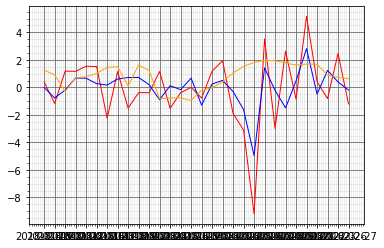

In [24]:
plt.plot(x_value,change_value, color='red', linewidth=1.0)
plt.plot(x_value,M_change_value, color='blue', linewidth=1.0)
plt.plot(x_value,beta_7_value, color='orange', linewidth=1.0)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.figure
plt.show()


In [25]:
stock_df

,Date,Open,High,Low,Close,Change(%),market_Change(%),Beta_7D,Beta_30D,K value,D value
0,2010-01-04,24.568600,25.515600,23.937300,25.515600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2010-01-05,25.936399,25.962700,23.753201,23.937300,-6.185628,0.043261,0.000000,0.000000,0.000000,0.000000
2,2010-01-06,23.989901,24.989500,23.937300,24.253000,1.318862,1.415346,0.000000,0.000000,0.000000,0.000000
3,2010-01-07,24.936899,24.989500,23.779499,23.858400,-1.627015,-1.083145,0.000000,0.000000,0.000000,0.000000
4,2010-01-08,24.568600,25.515600,24.463400,25.515600,6.945981,0.527841,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2446,2019-12-25,56.599998,57.400002,56.299999,57.000000,0.706717,0.265105,-0.680702,0.016331,83.063237,79.814951
2447,2019-12-26,58.000000,59.200001,57.599998,58.299999,2.280700,-0.059294,-0.530902,-0.133854,84.231204,81.287035
2448,2019-12-27,58.599998,59.599998,58.400002,59.400002,1.886798,0.754770,-0.093267,-0.056504,88.492463,83.688844
2449,2019-12-30,61.799999,65.300003,61.799999,65.300003,9.932661,-0.316085,-2.971407,-0.560891,92.328309,86.568666


In [26]:
'''
EMA = EMA(t-1) + a * (Price(today) - EMA(t-1)),  a = 2/ N +1
SHORT TERM :EMA 12 , LONG TERM :EMA 26
DIF = EMA12- EMA26
MACD = EMA(DIF,9)
'''

'\nEMA = EMA(t-1) + a * (Price(today) - EMA(t-1)),  a = 2/ N +1\nSHORT TERM :EMA 12 , LONG TERM :EMA 26\nDIF = EMA12- EMA26\nMACD = EMA(DIF,9)\n'

In [27]:
def EMA(info,N):
    alpha = 2/(N+1)
    sma = 0.0
    for i in range(N):
        sma = sma + info[i:i+1]
    EMA = [float(sma)/N]
    for i in range(1,2451,1):
        ema = EMA[i-1] + alpha * (info[i:i+1] -EMA[i-1])
        EMA.extend(ema)
    return EMA

In [28]:
def EMA_D(info,N):
    alpha = 2/(N+1)
    sma = 0.0
    for i in range(N):
        sma = sma + stock_df[i:i+1]["DIF"].values
    EMA = [float(sma)/N]
    for i in range(1,2451,1):
        ema = EMA[i-1] + alpha * (stock_df[i:i+1]["DIF"].values -EMA[i-1])
        EMA.extend(ema)
    return EMA

In [29]:
EMA12 = EMA(stock_df[:]["Close"].values,12)
EMA26 = EMA(stock_df[:]["Close"].values,26)
stock_df["EMA 12"] = EMA12
stock_df["EMA 26"] = EMA26

In [30]:
DIF = np.array(EMA12) - np.array(EMA26)
stock_df["DIF"] = DIF
MACD = EMA_D(DIF,9)
stock_df["MACD"] = MACD

In [31]:
stock_df

,Date,Open,High,Low,Close,Change(%),market_Change(%),Beta_7D,Beta_30D,K value,D value,EMA 12,EMA 26,DIF,MACD
0,2010-01-04,24.568600,25.515600,23.937300,25.515600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.503367,28.833012,-0.329645,-0.743299
1,2010-01-05,25.936399,25.962700,23.753201,23.937300,-6.185628,0.043261,0.000000,0.000000,0.000000,0.000000,27.800895,28.470366,-0.669472,-0.728534
2,2010-01-06,23.989901,24.989500,23.937300,24.253000,1.318862,1.415346,0.000000,0.000000,0.000000,0.000000,27.255065,28.157969,-0.902904,-0.763408
3,2010-01-07,24.936899,24.989500,23.779499,23.858400,-1.627015,-1.083145,0.000000,0.000000,0.000000,0.000000,26.732501,27.839482,-1.106981,-0.832122
4,2010-01-08,24.568600,25.515600,24.463400,25.515600,6.945981,0.527841,0.000000,0.000000,0.000000,0.000000,26.545285,27.667343,-1.122057,-0.890109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,2019-12-25,56.599998,57.400002,56.299999,57.000000,0.706717,0.265105,-0.680702,0.016331,83.063237,79.814951,54.882798,54.107796,0.775002,0.256175
2447,2019-12-26,58.000000,59.200001,57.599998,58.299999,2.280700,-0.059294,-0.530902,-0.133854,84.231204,81.287035,55.408521,54.418330,0.990191,0.402978
2448,2019-12-27,58.599998,59.599998,58.400002,59.400002,1.886798,0.754770,-0.093267,-0.056504,88.492463,83.688844,56.022595,54.787342,1.235253,0.569433
2449,2019-12-30,61.799999,65.300003,61.799999,65.300003,9.932661,-0.316085,-2.971407,-0.560891,92.328309,86.568666,57.449889,55.566058,1.883831,0.832313


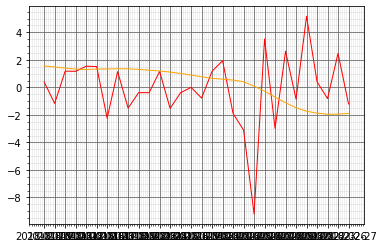

In [32]:
MACD_value = stock_df[1970:2000]["MACD"].values
plt.plot(x_value,change_value, color='red', linewidth=1.0)
plt.plot(x_value,MACD_value, color='orange', linewidth=1.0)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.figure
plt.show()


[-0.32964515 -0.66947162 -0.90290407 ...  1.23525258  1.88383052
  2.5460058 ]
['2018-01-09' '2018-01-10' '2018-01-11' '2018-01-12' '2018-01-15'
 '2018-01-16' '2018-01-17' '2018-01-18' '2018-01-19' '2018-01-22'
 '2018-01-23' '2018-01-24' '2018-01-25' '2018-01-26' '2018-01-29'
 '2018-01-30' '2018-01-31' '2018-02-01' '2018-02-02' '2018-02-05'
 '2018-02-06' '2018-02-07' '2018-02-08' '2018-02-09' '2018-02-12'
 '2018-02-21' '2018-02-22' '2018-02-23' '2018-02-26' '2018-02-27']


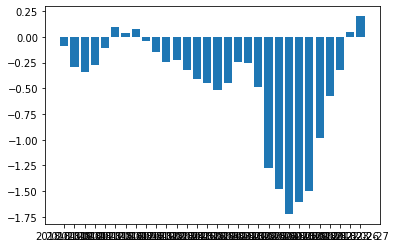

In [33]:
print(DIF)
print(x_value)
plt.bar(x_value,DIF[1970:2000]-MACD[1970:2000])
plt.show()

In [36]:
stock_df.to_csv("3450Inf.csv",index = False)

In [35]:
stock_df[1000:1009][["Date","Close","K "]]

KeyError: "['K '] not in index"